In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
%matplotlib notebook
np.set_printoptions(precision = 4)
np.set_printoptions(suppress = True)

### Newton's method

In [ ]:
class NewtonMethod:
    def __init__(self):
        pass
    
    def function(self, X):
        return np.cos(X) - X**3
    
    def gradient(self, X):
        return -np.sin(X) - 3* X**2
        
    def run(self):
        X = np.random.random()
        for i in range(10):
            print("x_{} = {}".format(i, X))
            X = X - self.function(X) / self.gradient(X)

In [4]:
function = "(X-0.3)**2 + (Y+11)**2 + 3"
x = np.linspace(-100, 100, num = 100)
y = np.linspace(-100, 100, num = 100)
X, Y = np.meshgrid(x, y)
Z = eval(function)

<IPython.core.display.Javascript object>


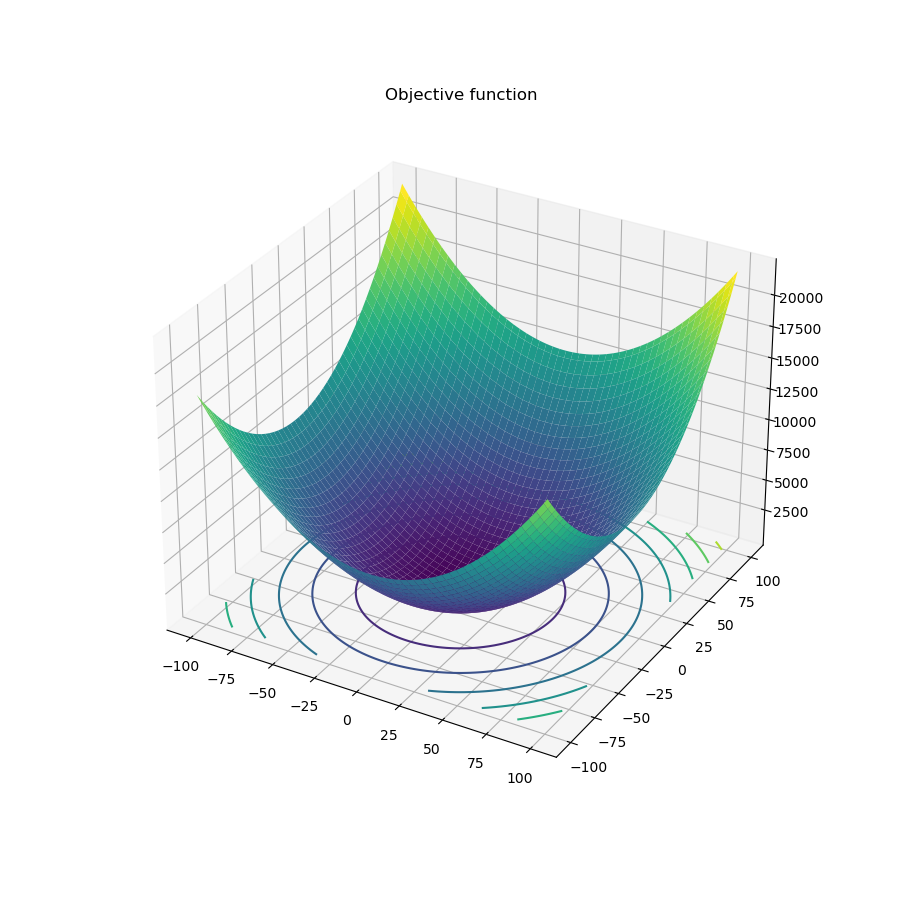

In [8]:
fig = plt.figure(figsize = (9,9))
ax = plt.axes(projection = "3d")
ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor = "none")
ax.set_title("Objective function")
ax.contour(X, Y, Z, zdir = 'z', offset = Z.min())
ax.set_label('x')
ax.set_label('y')
ax.set_label('z')
plt.show()

### Gradient descent

In [21]:
class GradientDescent:
    
    def __init__(self, n_dim: int, learning_rate = 0.01, minimize = True, iterations = 1000):
        self.n_dim = n_dim
        self.learning_rate = learning_rate
        self.minimize = minimize
        self.parameters = np.random.rand(n_dim) * 100
        self.iterations = iterations
        
    @staticmethod
    def compute_gradient(x: int, y: int) -> np.array:
        return np.array([2*(x-0.3), 2*(y + 11)])
        
    def run(self) -> np.array:
        history = []
        for i in range(self.iterations):
            history.append(self.parameters.tolist() + [(self.parameters[0] - 0.3) ** 2 + (self.parameters[1] + 11) **2 + 3])
            gradient = self.compute_gradient(self.parameters[0], self.parameters[1])
            if self.minimize:
                self.parameters = self.parameters - self.learning_rate * gradient
            else:
                self.parameters = self.parameters + self.learning_rate * gradient
        return np.array(history)

In [22]:
gd = GradientDescent(n_dim = 2)
history = gd.run()

<IPython.core.display.Javascript object>


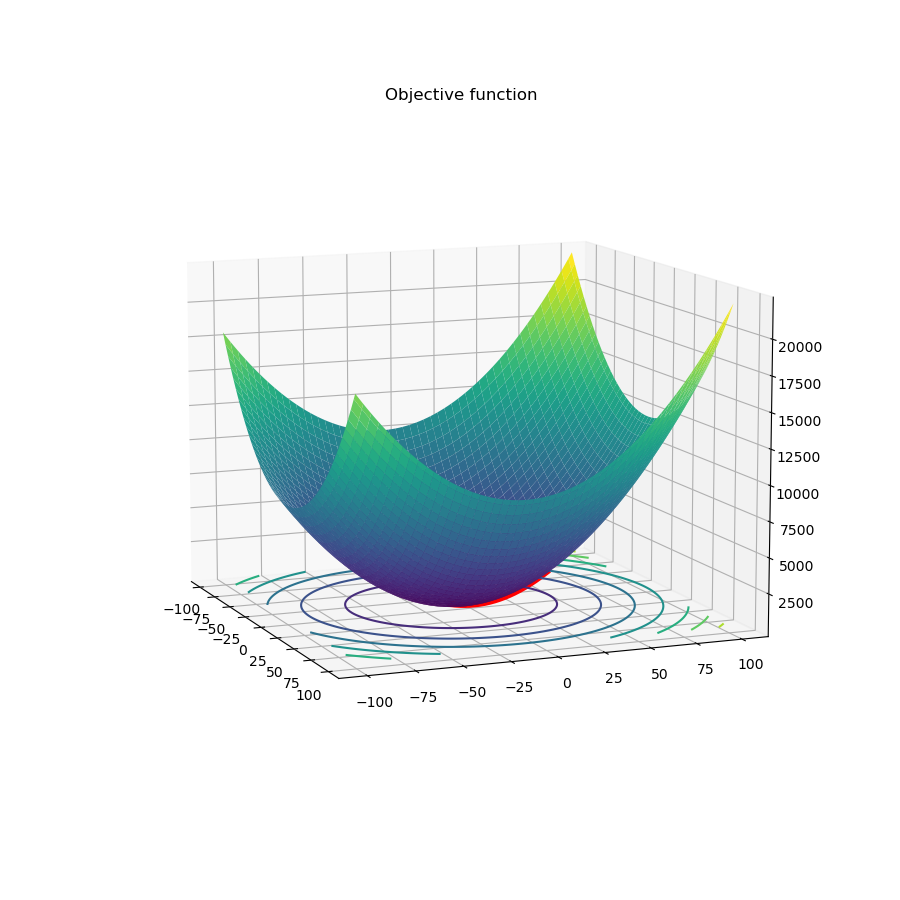

In [29]:
fig = plt.figure(figsize = (9,9))
ax = plt.axes(projection = "3d")
ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor = "none")
ax.set_title("Objective function")
ax.contour(X, Y, Z, zdir = 'z', offset = Z.min())
ax.set_label('x')
ax.set_label('y')
ax.set_label('z')
ax.plot3D(history[:, 0], history[:, 1], history[:, 2], "red", linewidth = 5, linestyle = "-", zorder = 1) # x, y, z
plt.show()

In [25]:
history[-1, :2]

array([  0.3, -11. ])